<a href="https://colab.research.google.com/github/marielnr/Exoplanets_Habitability/blob/main/Exoplanetas_Kepler_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NASA Exoplanet Archive. (2025). Cumulative Kepler Object of Interest (KOI) table [Data set]. NASA Exoplanet Science Institute. https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

In [5]:
df = pd.read_csv('cumulative.csv', comment='#')

In [6]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


#EDA

In [7]:
print(df.shape)  # de filas y columnas
print(df.columns)  #Lista de columnas
df.info()  #resumen de tipos y valores nulos
df.describe()  #estadísticas básicas de columnas numéricas

(9564, 49)
Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (tot

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [8]:
columns_to_keep = ['koi_prad', 'koi_teq', 'koi_insol', 'koi_disposition', 'koi_steff', 'koi_srad']
df_clean = df[columns_to_keep].dropna()
print(df_clean.shape)

(9201, 6)


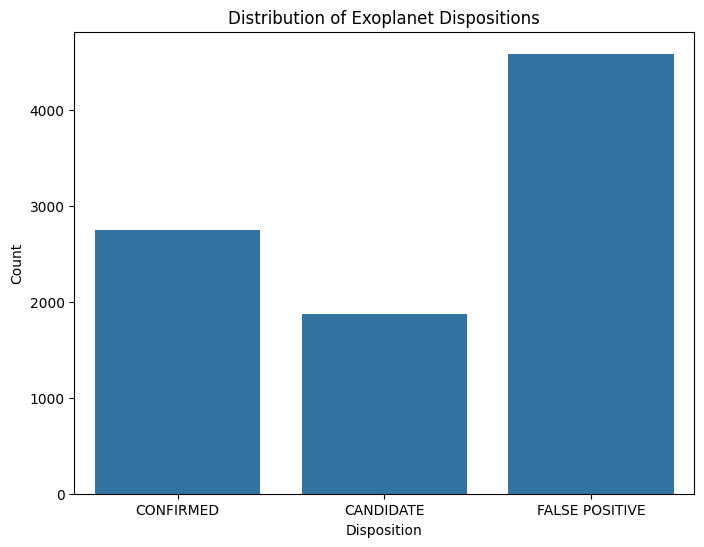

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='koi_disposition')
plt.title('Distribution of Exoplanet Dispositions')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

count    8831.000000
mean       11.510650
std        19.584653
min         0.080000
25%         1.370000
50%         2.290000
75%         9.740000
max        99.660000
Name: koi_prad, dtype: float64


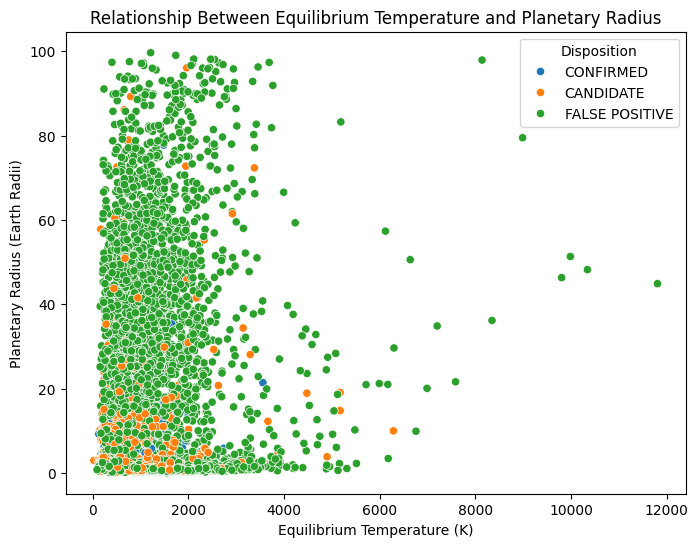

In [15]:
#filter out unrealistic planetary radii
df_clean = df_clean[df_clean['koi_prad'] <= 100]

#recheck summary statistics
print(df_clean['koi_prad'].describe())

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='koi_teq', y='koi_prad', hue='koi_disposition')
plt.title('Relationship Between Equilibrium Temperature and Planetary Radius')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Planetary Radius (Earth Radii)')
plt.legend(title='Disposition')
plt.show()

The equilibrium temperature (koi_teq) of an exoplanet is an estimate of its effective temperature, assuming it absorbs and re-emits all incoming stellar radiation without an atmosphere (i.e., no greenhouse effect). The planetary radius (koi_prad), measured in Earth radii, indicates the size of the planet, which influences its surface area and potential to retain an atmosphere.

In [16]:
df_clean.to_csv('df_clean.csv', index=False)
print("Cleaned data saved as 'df_clean.csv'")

Cleaned data saved as 'df_clean.csv'


A planet is considered potentially habitable if:

koi_teq is between 200 K and 400 K (approximate habitable zone for Earth-like conditions).

koi_prad is between 0.5 and 2 Earth radii (rocky planet size range).

In [18]:
df_clean['is_habitable'] = ((df_clean['koi_teq'] >= 200) & (df_clean['koi_teq'] <= 400) &
                           (df_clean['koi_prad'] >= 0.5) & (df_clean['koi_prad'] <= 2)).astype(int)
print(df_clean['is_habitable'].value_counts())  # (0 = not habitable, 1 = habitable)

is_habitable
0    8417
1     414
Name: count, dtype: int64


In [22]:
df_clean['insol_ratio'] = df_clean['koi_insol'] / 1.0
df_clean['log_teq'] = np.log1p(df_clean['koi_teq'])  # log(1 + x) to handle zeros
df_clean['log_prad'] = np.log1p(df_clean['koi_prad'])

#Logistic Regression Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [27]:
features = ['koi_teq', 'koi_prad', 'koi_steff', 'koi_srad', 'insol_ratio', 'log_teq', 'log_prad']
X = df_clean[features]
y = df_clean['is_habitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (7064, 7), Test set size: (1767, 7)


In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.98


In [32]:
df_clean.to_csv('df_processed.csv', index=False)
print("Processed data saved as 'df_processed.csv'")

Processed data saved as 'df_processed.csv'


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


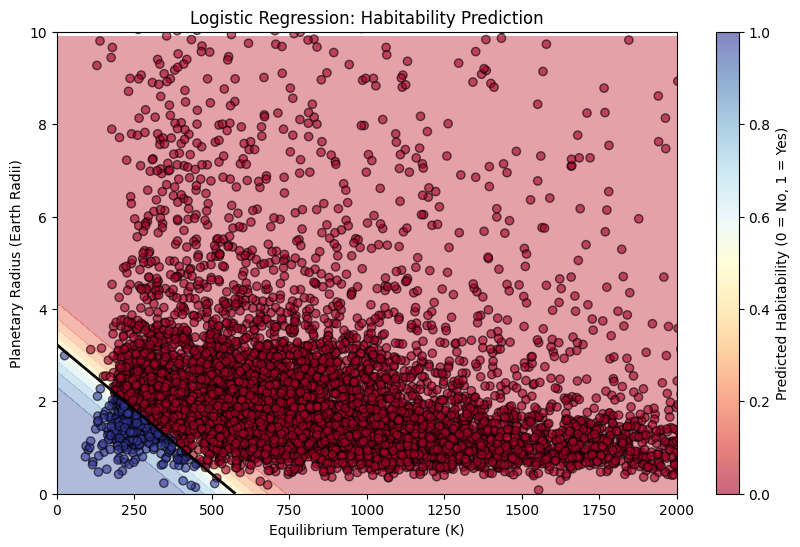

In [45]:
X = df_clean[['koi_teq', 'koi_prad']]
y = df_clean['is_habitable']


model = LogisticRegression(max_iter=1000)
model.fit(X, y)


h = 0.1  # Smaller step size for a valid mesh grid
x_min, x_max = 0, 2000  # Limit to 0-2000 K
y_min, y_max = 0, 10    # Limit to 0-10 Earth radii
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=10, cmap='RdYlBu', alpha=0.4)  # More levels for better gradient
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)  # Clear decision boundary
scatter = plt.scatter(X['koi_teq'], X['koi_prad'], c=model.predict(X), cmap='RdYlBu', edgecolor='k', alpha=0.6)
plt.colorbar(scatter, label='Predicted Habitability (0 = No, 1 = Yes)')
plt.title('Logistic Regression: Habitability Prediction')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Planetary Radius (Earth Radii)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()